In [48]:
%env DB_NAME = pgequity
%env  DB_USER = pgequity
%env DB_PASSWORD = pgequity
%env DB_HOST = localhost
%env DB_PORT = 5432

env: DB_NAME=pgequity
env: DB_USER=pgequity
env: DB_PASSWORD=pgequity
env: DB_HOST=localhost
env: DB_PORT=5432


                                 PDIFF(C(IBM),-1)  PDIFF(C(IBM),1)  \
PDIFF(C(IBM),-1)                         1.000160         0.039596   
PDIFF(C(IBM),1)                          0.039596         1.000160   
RENTROPY(C(IBM),10)                      0.007527         0.014809   
RENTROPY(C(IBM),20)                      0.009073        -0.007455   
RENTROPY(C(IBM),50)                      0.009480        -0.017709   
STOCH_OSC(IBM,10)                        0.008748         0.446977   
STOCH_OSC(IBM,20)                       -0.003261         0.347329   
STOCH_OSC(IBM,50)                        0.002428         0.232914   
RAVG(C(IBM),10)/RAVG(C(IBM),20)         -0.011519         0.041751   
RAVG(C(IBM),20)/RAVG(C(IBM),50)          0.033683        -0.027874   

                                 RENTROPY(C(IBM),10)  RENTROPY(C(IBM),20)  \
PDIFF(C(IBM),-1)                            0.007527             0.009073   
PDIFF(C(IBM),1)                             0.014809            -0.007455  

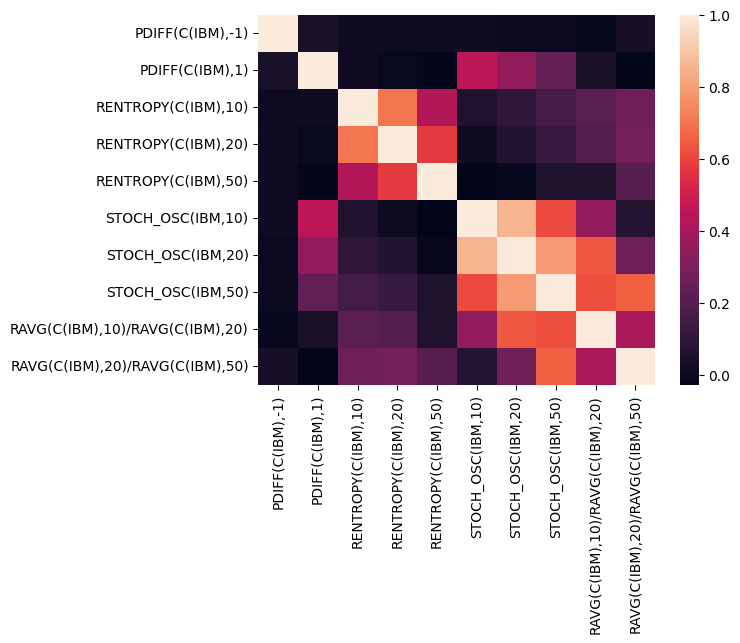

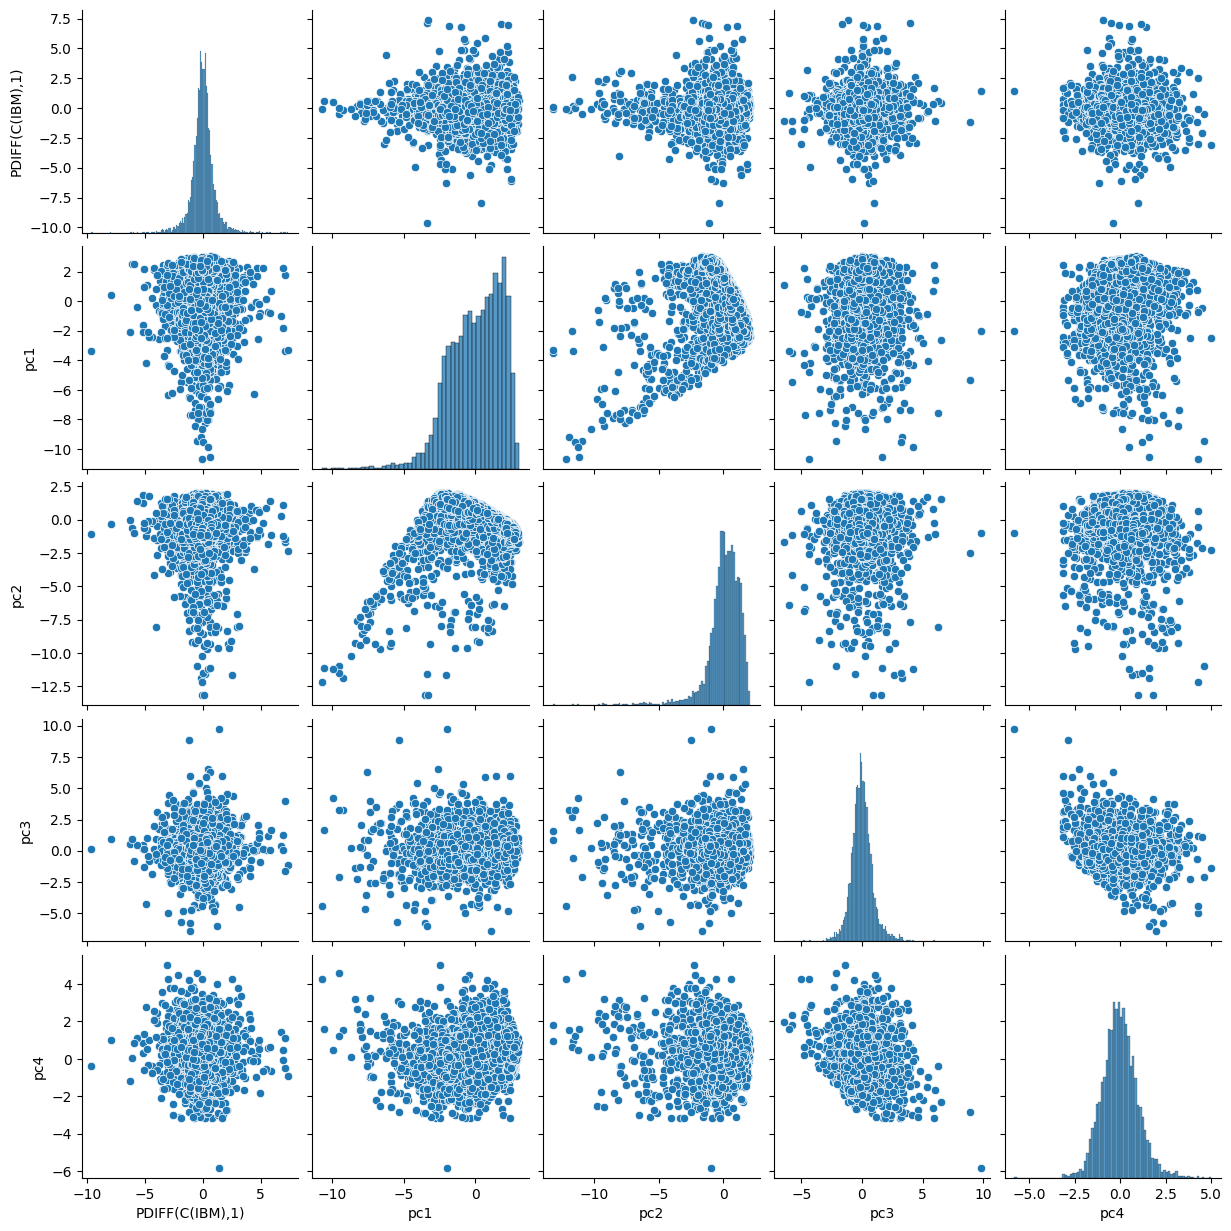

In [49]:
# from pynoahdb.series import Series
from pyfunc.processor import Processor

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
import pandas as pd

from sklearn.decomposition import PCA



entries = [
    'PDIFF(C(IBM),-1)',
    'PDIFF(C(IBM),1)',
    'RENTROPY(C(IBM),10)',
    'RENTROPY(C(IBM),20)',
    'RENTROPY(C(IBM),50)',
    'STOCH_OSC(IBM,10)',
    'STOCH_OSC(IBM,20)',
    'STOCH_OSC(IBM,50)',
    'RAVG(C(IBM),10)/RAVG(C(IBM),20)',
    'RAVG(C(IBM),20)/RAVG(C(IBM),50)',
]

df = Processor().process('|'.join(entries))


#normalize the data using sklearn
scaler = StandardScaler()
df = scaler.fit_transform(df)

df = pd.DataFrame(df, columns=entries)

dfFeatures = df.drop('PDIFF(C(IBM),1)', axis=1)
dfFeatures.dropna(inplace=True)

dfTarget = df['PDIFF(C(IBM),1)']

#calculate covariance matrix
covMatrix = pd.DataFrame(data = df).cov()
print(covMatrix)
sns.heatmap(covMatrix, fmt='g')


pca = PCA(n_components=4)

principalComponents = pca.fit_transform(dfFeatures)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2', 'pc3', 'pc4'])

finalDf = pd.concat([df[['PDIFF(C(IBM),1)']],principalDf], axis = 1)
finalDf.dropna(inplace=True)

finalDf.head()

df.dropna(inplace=True)

sns.pairplot(finalDf)

#run a linear regression
from sklearn.linear_model import LinearRegression

X = finalDf[['pc1', 'pc2', 'pc3', 'pc4']]
y = finalDf['PDIFF(C(IBM),1)']

lm = LinearRegression()
lm.fit(X,y)

print(lm.intercept_)
print(lm.coef_)
print(lm.score(X,y))


